For sigma = 15
PSNR: 31.7936693861356
PSNR cropped: 32.00940371641031


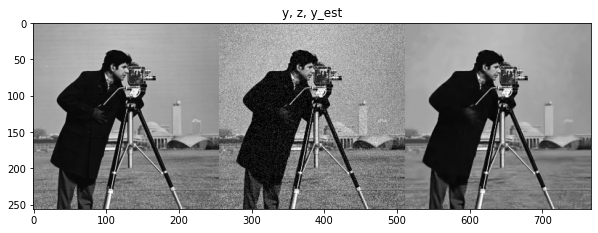

In [12]:
"""
Grayscale BM3D denoising demo file, based on Y. Mäkinen, L. Azzari, A. Foi, 2019.
Exact Transform-Domain Noise Variance for Collaborative Filtering of Stationary Correlated Noise.
In IEEE International Conference on Image Processing (ICIP), pp. 185-189
"""


import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from bm3d import bm3d, BM3DProfile
from experiment_funcs import get_experiment_noise, get_psnr, get_cropped_psnr

def main():
    # Experiment specifications
    imagename = 'cameraman256.png'

    # Load noise-free image
    y = np.array(Image.open(imagename)) / 255
    # Possible noise types to be generated 'gw', 'g1', 'g2', 'g3', 'g4', 'g1w',
    # 'g2w', 'g3w', 'g4w'.
    noise_type = 'gw'
    ############## We can adjust sigma from here
    sigma = 15
    print('For sigma = ' + str(sigma))
    noise_var = (sigma/255)**2
#     noise_var = 0.01  # Noise variance
    seed = 0  # seed for pseudorandom noise realization

    # Generate noise with given PSD
    noise, psd, kernel = get_experiment_noise(noise_type, noise_var, seed, y.shape)


    # Generate noisy image corrupted by additive spatially correlated noise
    # with noise power spectrum PSD
    z = np.atleast_3d(y) + np.atleast_3d(noise)

    # Call BM3D With the default settings.
    y_est = bm3d(z, psd)

    # To include refiltering:
    # y_est = bm3d(z, psd, 'refilter')

    psnr = get_psnr(y, y_est)
    print("PSNR:", psnr)

    # PSNR ignoring 16-pixel wide borders (as used in the paper), due to refiltering potentially leaving artifacts
    # on the pixels near the boundary of the image when noise is not circulant
    psnr_cropped = get_cropped_psnr(y, y_est, [16, 16])
    print("PSNR cropped:", psnr_cropped)

    # Ignore values outside range for display (or plt gives an error for multichannel input)
    y_est = np.minimum(np.maximum(y_est, 0), 1)
    z_rang = np.minimum(np.maximum(z, 0), 1)
    plt.figure(figsize=(10,10))
    plt.title("y, z, y_est")
    plt.imshow(np.concatenate((y, np.squeeze(z_rang), y_est), axis=1), cmap='gray')
    plt.show()


if __name__ == '__main__':
    main()

